In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import pandas as pd
from path import Path
file_path = Path("./Encoded_Data.csv")
Encoded_data_df = pd.read_csv(file_path)
Encoded_data_df.head()

,duration,country,language 1,weighted_average_rating,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,...,Horror,Family,Action,Romance,Mystery,History,Sci-Fi,Animation,Thriller,Sport
0,100,148,38,5,446,23,23,111,193,299,...,0,0,0,0,0,1,0,0,0,0
1,68,66,68,7,2237,0,402,895,482,1607,...,0,0,0,0,0,0,0,0,0,0
2,60,148,38,6,484,35,35,177,168,354,...,0,0,0,0,0,0,0,0,0,0
3,85,47,49,7,753,0,59,287,276,530,...,0,0,0,1,0,0,0,0,0,0
4,120,66,68,6,273,0,34,99,69,191,...,0,0,0,0,0,1,0,0,0,0


In [2]:
X = Encoded_data_df.copy()
X = X.drop("weighted_average_rating", axis=1)
X.head()

,duration,country,language 1,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,...,Horror,Family,Action,Romance,Mystery,History,Sci-Fi,Animation,Thriller,Sport
0,100,148,38,446,23,23,111,193,299,39,...,0,0,0,0,0,1,0,0,0,0
1,68,66,68,2237,0,402,895,482,1607,215,...,0,0,0,0,0,0,0,0,0,0
2,60,148,38,484,35,35,177,168,354,31,...,0,0,0,0,0,0,0,0,0,0
3,85,47,49,753,0,59,287,276,530,93,...,0,0,0,1,0,0,0,0,0,0
4,120,66,68,273,0,34,99,69,191,21,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Define target vector
y = Encoded_data_df["weighted_average_rating"].values

In [4]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a regressor object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=800,
                                            learning_rate=learning_rate,
                                            max_features=20,
                                            max_depth=3,
                                            random_state=78)

    # Fit the model
    regressor.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        regressor.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        regressor.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.480
Accuracy score (validation): 0.459

Learning rate:  0.1
Accuracy score (training): 0.516
Accuracy score (validation): 0.479

Learning rate:  0.25
Accuracy score (training): 0.571
Accuracy score (validation): 0.487

Learning rate:  0.5
Accuracy score (training): 0.617
Accuracy score (validation): 0.476

Learning rate:  0.75
Accuracy score (training): 0.640
Accuracy score (validation): 0.443

Learning rate:  1
Accuracy score (training): 0.647
Accuracy score (validation): 0.408



In [6]:
print(regressor.score(X_test_scaled, y_test))

0.40822330914862015


In [7]:
# Create the mean squared error
#
mse = mean_squared_error(y_test, regressor.predict(X_test_scaled))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.9478


In [8]:
print(regressor.predict(X_test_scaled))

[6.24938585 3.24462037 5.50903707 ... 4.76757812 5.98908598 3.28702306]


In [9]:
print(X_test_scaled)

[[-0.46690775  0.89560194 -0.58804202 ... -0.15942142 -0.39447238
  -0.11150972]
 [-0.86608898  0.15875238 -0.58804202 ... -0.15942142 -0.39447238
  -0.11150972]
 [ 0.42016166 -1.2944787  -0.58804202 ... -0.15942142  2.53503171
  -0.11150972]
 ...
 [ 0.28710124 -0.90558587  0.04926062 ... -0.15942142  2.53503171
  -0.11150972]
 [-0.2451404  -1.15120239 -0.2693907  ... -0.15942142 -0.39447238
  -0.11150972]
 [ 2.99266292 -0.90558587  2.42466136 ... -0.15942142 -0.39447238
  -0.11150972]]


In [10]:
print(y_test)

[6 2 4 ... 6 7 4]


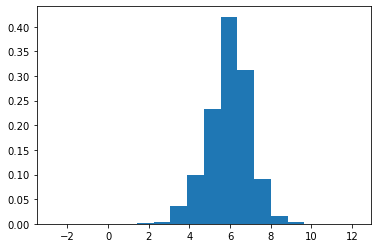

In [11]:
import matplotlib.pyplot as plt
a  = regressor.predict(X_test_scaled)
#plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
plt.xlim(min(a), max(a))
plt.hist(a, density=True, bins=20) 
plt.show()

[6, 2, 4, 6, 3, 6, 5, 6, 5, 7, 7, 4, 7, 7, 7, 8, 8, 6, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 7, 5, 7, 5, 7, 5, 7, 6, 5, 7, 7, 5, 5, 6, 5, 5, 6, 7, 6, 7, 3, 7, 6, 7, 4, 7, 7, 8, 7, 6, 7, 5, 7, 8, 7, 4, 7, 6, 7, 5, 7, 6, 7, 4, 7, 7, 5, 7, 7, 5, 6, 6, 7, 6, 2, 7, 6, 7, 8, 6, 5, 4, 7, 7, 5, 7, 6, 4, 7, 7, 7, 4, 5, 6, 5, 3, 6, 5, 3, 3, 7, 3, 7, 4, 8, 4, 7, 6, 6, 7, 7, 7, 7, 6, 6, 7, 6, 7, 6, 6, 7, 7, 5, 4, 7, 7, 6, 8, 6, 5, 5, 5, 6, 7, 7, 8, 7, 5, 4, 7, 5, 7, 7, 6, 5, 7, 8, 7, 6, 7, 6, 6, 6, 8, 6, 2, 5, 5, 5, 6, 6, 5, 4, 7, 7, 3, 5, 4, 2, 6, 5, 7, 7, 5, 6, 5, 6, 6, 6, 7, 6, 6, 7, 5, 5, 6, 6, 5, 7, 3, 6, 5, 7, 6, 5, 7, 7, 6, 6, 5, 6, 2, 7, 6, 5, 7, 5, 4, 7, 5, 7, 6, 7, 4, 7, 9, 4, 7, 8, 6, 7, 6, 7, 6, 8, 4, 6, 6, 4, 6, 6, 6, 5, 7, 4, 6, 8, 7, 7, 7, 4, 6, 6, 6, 7, 7, 6, 5, 7, 7, 6, 7, 6, 8, 8, 6, 5, 3, 4, 7, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 7, 7, 4, 5, 6, 7, 6, 6, 6, 7, 3, 7, 5, 6, 5, 6, 6, 6, 6, 7, 7, 7, 5, 6, 5, 6, 4, 6, 6, 4, 7, 7, 6, 3, 5, 7, 6, 4, 6, 5, 6, 7, 7, 6, 6, 5, 8, 8, 5, 6, 3, 6, 6, 

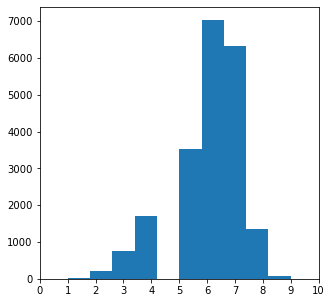

In [15]:
new = []
for i in y_test:
  if i >= 0 and i<=10:
    new.append(i)
print(new)
values = ['0', '1', '2', '3', '4','5','6', '7', '8', '9', '10']
tickvalues = range(0,len(values))
plt.figure(figsize = (5,5))
plt.hist(new, bins = 10)
plt.xticks(ticks = tickvalues ,labels = values)
plt.show()